In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import skimage.io as io
from skimage.feature import hog
from skimage.transform import resize

# Visualize some examples of HOG

In [94]:
# image size to pass to HOG Algorithm
HOG_ROWS = 64
HOG_COLS = 128

In [95]:
tiki_label = pd.read_csv('./labels_tiki.csv', names=['label', 'x', 'y', 'w', 'h', 'img_name', 'raw_w', 'raw_h'])
boxes = tiki_label = tiki_label[tiki_label['label'] == 'tiki']
tiki_label.head()

,label,x,y,w,h,img_name,raw_w,raw_h
0,tiki,3171,1344,592,389,img_0.png,5499,2582
1,tiki,25,4,116,46,img_1.jpg,800,800
2,tiki,362,42,100,43,img_1.jpg,800,800
3,tiki,99,38,491,197,img_7.jpg,700,400
4,tiki,28,38,32,24,img_8.jpg,600,315


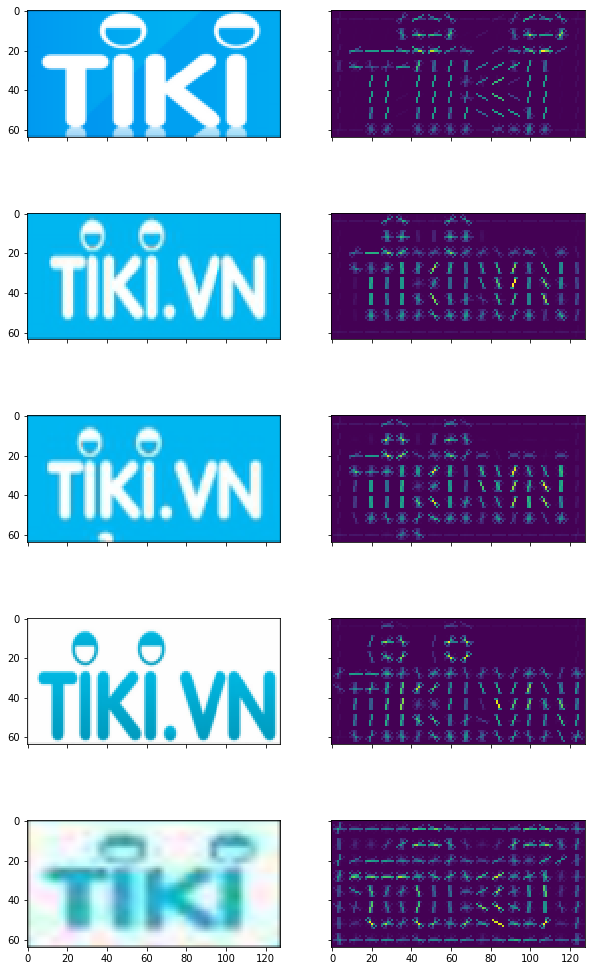

In [96]:
num_samples = 5
figure, axes = plt.subplots(len(boxes[:num_samples]), 2, sharex=True, sharey=True, figsize=(10, 18))

for i, box in enumerate(boxes[:num_samples].itertuples()):
    img = io.imread('dataset/download/tiki/' + box.img_name)
    box_x, box_y, box_w, box_h = box.x, box.y, box.w, box.h
                            
    crop = img[box_y:box_y+box_h, box_x:box_x+box_w, :]
    crop_resize = resize(crop, (HOG_ROWS, HOG_COLS), mode='constant')
                            
    hog_feature, visualize_img = hog(crop_resize, visualize=True)
    axes[i, 0].imshow(crop_resize)
    axes[i, 1].imshow(visualize_img)
    
plt.show()

In [97]:
vng_label = pd.read_csv('./labels_2.csv', names=['label', 'x', 'y', 'w', 'h', 'img_name', 'raw_w', 'raw_h'])
boxes = vng_label[vng_label['label'] == 'vng']
boxes.head()

,label,x,y,w,h,img_name,raw_w,raw_h
0,vng,149,12,186,232,img_0.jpg,484,252
1,vng,16,8,219,297,img_1.png,640,320
2,vng,141,98,344,477,img_6.jpg,1254,640
3,vng,341,7,246,294,img_7.png,640,320
4,vng,13,4,197,283,img_12.png,650,363


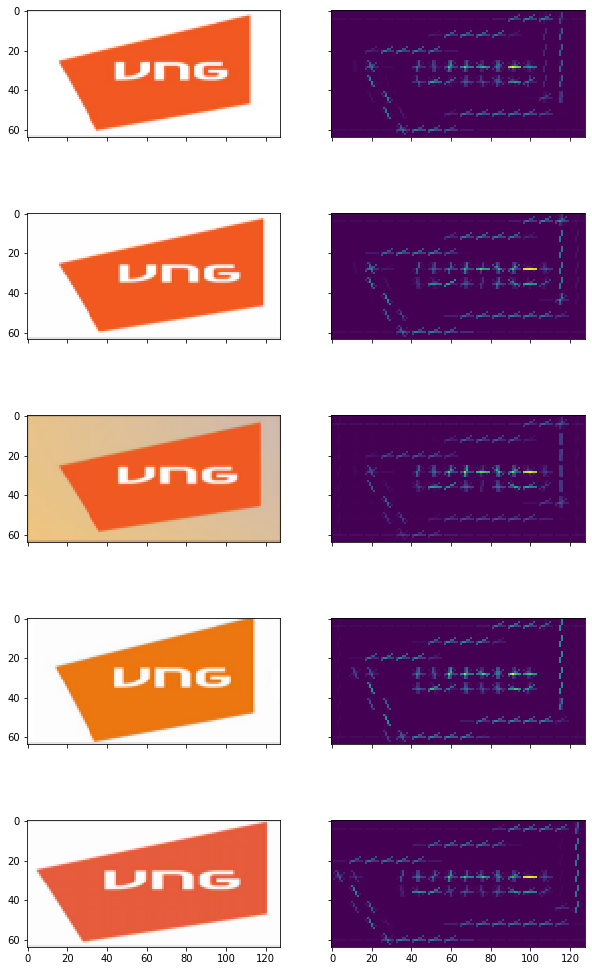

In [98]:
num_samples = 5
figure, axes = plt.subplots(len(boxes[:num_samples]), 2, sharex=True, sharey=True, figsize=(10, 18))

for i, box in enumerate(boxes[:num_samples].itertuples()):
    img = io.imread('dataset/download/vng/' + box.img_name)
    box_x, box_y, box_w, box_h = box.x, box.y, box.w, box.h
                            
    crop = img[box_y:box_y+box_h, box_x:box_x+box_w, :]
    crop_resize = resize(crop, (HOG_ROWS, HOG_COLS), mode='constant')
                            
    hog_feature, visualize_img = hog(crop_resize, visualize=True)
    axes[i, 0].imshow(crop_resize)
    axes[i, 1].imshow(visualize_img)
    
plt.show()